# Observação dos dados

In [72]:
#Libs
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from os import listdir

In [2]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
#Carregando datasets
input_dir = '../input/'
files = listdir(input_dir)
files

['train.csv', 'zip_files', 'test.csv', 'sample_submission.csv']

In [4]:
df_train = pd.read_csv(input_dir + files[0])
df_test = pd.read_csv(input_dir + files[2])

In [5]:
#Observando a variável target
df_train.groupby('TARGET')['TARGET'].count()

TARGET
0    73012
1     3008
Name: TARGET, dtype: int64

TARGET é a variável que estamos tentando prever, representando a satisfação do cliente:
0 = Satisfeito
1 = Insatisfeito

Percebemos que há uma quantidade muito maior de clientes satisfeitos que insatisfeitos.
Nosso objetivo será analisar as variáveis disponíveis nesse dataset e identificar quais melhor representam o índice de satisfação

In [6]:
df_train.shape

(76020, 371)

Existem 371 variáveis neste dataset. É inviável selecionar todas essas para treinar o modelo preditivo, portanto, será necessário empregar algumas técnicas de redução de dimensionalidade

In [7]:
#Verificando se os dados disponíveis para treino são os mesmos disponíveis para teste
set(df_train.drop('TARGET', axis=1).columns == df_test.columns)

{True}

Todas variáveis disponíveis no dataset de treino estão disponíveis no dataset de testes

In [8]:
#Tipos de variáveis
df_train.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

As variáveis já estão em formatos numéricos

In [9]:
na_cols = df_train.isnull().sum()
na_cols = na_cols[na_cols > 0]
print(na_cols)

Series([], dtype: int64)


Não há nenhum valor NA a ser preenchido

## Leitura de colunas

Cada variável possui uma breve descrição detalhando o seu significado.
Nessa etapa, vamos agrupar as variáveis com base em características inseridas em seus nomes.

In [10]:
#Nome das variáveis
sorted(list(df_train.columns))

['ID',
 'TARGET',
 'delta_imp_amort_var18_1y3',
 'delta_imp_amort_var34_1y3',
 'delta_imp_aport_var13_1y3',
 'delta_imp_aport_var17_1y3',
 'delta_imp_aport_var33_1y3',
 'delta_imp_compra_var44_1y3',
 'delta_imp_reemb_var13_1y3',
 'delta_imp_reemb_var17_1y3',
 'delta_imp_reemb_var33_1y3',
 'delta_imp_trasp_var17_in_1y3',
 'delta_imp_trasp_var17_out_1y3',
 'delta_imp_trasp_var33_in_1y3',
 'delta_imp_trasp_var33_out_1y3',
 'delta_imp_venta_var44_1y3',
 'delta_num_aport_var13_1y3',
 'delta_num_aport_var17_1y3',
 'delta_num_aport_var33_1y3',
 'delta_num_compra_var44_1y3',
 'delta_num_reemb_var13_1y3',
 'delta_num_reemb_var17_1y3',
 'delta_num_reemb_var33_1y3',
 'delta_num_trasp_var17_in_1y3',
 'delta_num_trasp_var17_out_1y3',
 'delta_num_trasp_var33_in_1y3',
 'delta_num_trasp_var33_out_1y3',
 'delta_num_venta_var44_1y3',
 'imp_amort_var18_hace3',
 'imp_amort_var18_ult1',
 'imp_amort_var34_hace3',
 'imp_amort_var34_ult1',
 'imp_aport_var13_hace3',
 'imp_aport_var13_ult1',
 'imp_aport_var17_h

In [11]:
#Agrupamos as variáveis pela primeira palavra antes da ocorrência do caracter _
colgroups = list(set([x.split('_')[0] for x in df_train.columns]))
sorted(colgroups)

['ID',
 'TARGET',
 'delta',
 'imp',
 'ind',
 'num',
 'saldo',
 'var15',
 'var21',
 'var3',
 'var36',
 'var38']

As variáveis podem ser agrupadas nas seguintes nomenclaturas:

* Delta;
* Imp;
* Ind;
* Num;
* Saldo;
* Var.

Faremos uma análise em cada grupo de variáveis, buscando correlações que expliquem o nível de satisfação do cliente

# Análise exploratória

Vamos selecionar um dataset balanceado com amostras equivalente de clientes satisfeitos e insatisfeitos

In [12]:
#Clientes insatisfeitos
unsatisfied_index = df_train[df_train.TARGET > 0].index

#Clientes satisfeitos selecionados aleatoriamente
satisfied_index = df_train[df_train.TARGET == 0].sample(len(unsatisfied_index), random_state = 5).index

#Amostra para análise
train_sample = pd.concat([df_train.iloc[satisfied_index],df_train.iloc[unsatisfied_index]], axis=0)

In [13]:
#Variável target
train_sample_y = train_sample.TARGET

#Demais datasets
train_sample_delta = train_sample.filter(regex='^delta')
train_sample_imp = train_sample.filter(regex='^imp')
train_sample_ind = train_sample.filter(regex='^ind')
train_sample_num = train_sample.filter(regex='^num')
train_sample_saldo = train_sample.filter(regex='^saldo')
train_sample_var = train_sample.filter(regex='^var')

## Delta

In [14]:
train_sample_delta.describe().T

,count,mean,std,min,25%,50%,75%,max
delta_imp_amort_var18_1y3,6016.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
delta_imp_amort_var34_1y3,6016.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
delta_imp_aport_var13_1y3,6016.00,36569148.92,603667757.05,-1.00,0.00,0.00,0.00,9999999999.00
delta_imp_aport_var17_1y3,6016.00,3324468.08,182316082.35,0.00,0.00,0.00,0.00,9999999999.00
delta_imp_aport_var33_1y3,6016.00,-0.00,0.01,-1.00,0.00,0.00,0.00,0.00
delta_imp_compra_var44_1y3,6016.00,6648936.17,257791000.45,-1.00,0.00,0.00,0.00,9999999999.00
delta_imp_reemb_var13_1y3,6016.00,3324468.08,182316082.35,0.00,0.00,0.00,0.00,9999999999.00
delta_imp_reemb_var17_1y3,6016.00,3324468.08,182316082.35,0.00,0.00,0.00,0.00,9999999999.00
delta_imp_reemb_var33_1y3,6016.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
delta_imp_trasp_var17_in_1y3,6016.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


## Imp

In [15]:
train_sample_imp.describe().T

,count,mean,std,min,25%,50%,75%,max
imp_ent_var16_ult1,6016.00,77.60,1093.63,0.00,0.00,0.00,0.00,51003.00
imp_op_var39_comer_ult1,6016.00,80.86,404.32,0.00,0.00,0.00,0.00,12888.03
imp_op_var39_comer_ult3,6016.00,123.30,545.06,0.00,0.00,0.00,0.00,13183.23
imp_op_var40_comer_ult1,6016.00,4.79,113.75,0.00,0.00,0.00,0.00,6300.69
imp_op_var40_comer_ult3,6016.00,6.85,147.03,0.00,0.00,0.00,0.00,7209.93
imp_op_var40_efect_ult1,6016.00,1.66,44.66,0.00,0.00,0.00,0.00,1800.00
imp_op_var40_efect_ult3,6016.00,2.35,61.88,0.00,0.00,0.00,0.00,3000.00
imp_op_var40_ult1,6016.00,3.30,69.65,0.00,0.00,0.00,0.00,2986.98
imp_op_var41_comer_ult1,6016.00,76.07,376.48,0.00,0.00,0.00,0.00,12888.03
imp_op_var41_comer_ult3,6016.00,116.46,508.96,0.00,0.00,0.00,0.00,13183.23


## Ind

In [16]:
train_sample_ind.describe().T

,count,mean,std,min,25%,50%,75%,max
ind_var1_0,6016.00,0.01,0.10,0.00,0.00,0.00,0.00,1.00
ind_var1,6016.00,0.01,0.07,0.00,0.00,0.00,0.00,1.00
ind_var2_0,6016.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ind_var2,6016.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ind_var5_0,6016.00,0.94,0.23,0.00,1.00,1.00,1.00,1.00
ind_var5,6016.00,0.52,0.50,0.00,0.00,1.00,1.00,1.00
ind_var6_0,6016.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ind_var6,6016.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ind_var8_0,6016.00,0.05,0.23,0.00,0.00,0.00,0.00,1.00
ind_var8,6016.00,0.04,0.20,0.00,0.00,0.00,0.00,1.00


## Num

In [17]:
train_sample_num.describe().T

,count,mean,std,min,25%,50%,75%,max
num_var1_0,6016.00,0.03,0.32,0.00,0.00,0.00,0.00,6.00
num_var1,6016.00,0.02,0.22,0.00,0.00,0.00,0.00,3.00
num_var4,6016.00,0.90,0.98,0.00,0.00,1.00,1.00,6.00
num_var5_0,6016.00,2.85,0.75,0.00,3.00,3.00,3.00,6.00
num_var5,6016.00,1.55,1.51,0.00,0.00,3.00,3.00,6.00
num_var6_0,6016.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
num_var6,6016.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
num_var8_0,6016.00,0.16,0.68,0.00,0.00,0.00,0.00,3.00
num_var8,6016.00,0.12,0.59,0.00,0.00,0.00,0.00,3.00
num_var12_0,6016.00,0.14,1.55,0.00,0.00,0.00,0.00,111.00


## Saldo

In [18]:
train_sample_saldo.describe().T

,count,mean,std,min,25%,50%,75%,max
saldo_var1,6016.00,7.81,153.58,0.00,0.00,0.00,0.00,7214.67
saldo_var5,6016.00,644.24,6024.53,-2895.72,0.00,1.50,20.73,179160.00
saldo_var6,6016.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
saldo_var8,6016.00,113.63,1489.07,-798.48,0.00,0.00,0.00,60098.49
saldo_var12,6016.00,2883.02,27477.80,0.00,0.00,0.00,0.00,668885.04
saldo_var13_corto,6016.00,2623.59,23670.17,0.00,0.00,0.00,0.00,450000.00
saldo_var13_largo,6016.00,778.30,12937.03,0.00,0.00,0.00,0.00,450000.00
saldo_var13_medio,6016.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
saldo_var13,6016.00,3401.89,27043.72,0.00,0.00,0.00,0.00,450000.00
saldo_var14,6016.00,34.53,1707.10,0.00,0.00,0.00,0.00,129014.79


## Var

In [19]:
train_sample_var.describe().T

,count,mean,std,min,25%,50%,75%,max
var3,6016.00,-1825.96,42724.97,-999999.00,2.00,2.00,2.00,225.00
var15,6016.00,36.19,12.84,9.00,25.00,33.00,44.00,102.00
var36,6016.00,52.15,48.44,0.00,2.00,99.00,99.00,99.00
var21,6016.00,29.57,479.53,0.00,0.00,0.00,0.00,30000.00
var38,6016.00,110188.36,176270.89,11136.63,61953.18,95826.74,117310.98,9792857.49
TARGET,6016.00,0.50,0.50,0.00,0.00,0.50,1.00,1.00


As principais características que pude observar em cada grupo de variáveis:

* Grande parte dos registros estão preenchidos com zeros.
    + Nestes casos, vamos verificar quais valores distintos estão presentes no conjunto, dada a possibilidade desta variável ser categórica.
* Alguns registros foram cadastrados com números excessivamente largos, tal como '9999999999.00' observado nas variáveis Delta e '-999999.00' observado na variável 'var3'.

## Seleção de variáveis

Para cada variável, calculamos:

* Quantidade de observações preenchidas com zeros (zero_count);
* Quantidade de valores distintos (unique_count);
* Média (mean), Mediana(median) e Máximo(max).

In [96]:
df_zero_count = (train_sample == 0).sum()
df_uniques = train_sample.nunique()
df_mean = train_sample.mean()
df_median = train_sample.median()
df_max = train_sample.max()

df_zero_means = pd.concat([df_zero_count, df_uniques, df_mean, df_median, df_max], axis=1).reset_index()
df_zero_means.columns = ['Column','Zero_count','Unique_count','Mean','Median','Max']
del(df_zero_count, df_uniques, df_mean, df_median, df_max)
df_zero_means.head(40)

,Column,Zero_count,Unique_count,Mean,Median,Max
0,ID,0,6016,76265.20,76597.50,151811.00
1,var3,7,41,-1825.96,2.00,225.00
2,var15,0,79,36.19,33.00,102.00
3,imp_ent_var16_ult1,5708,128,77.60,0.00,51003.00
4,imp_op_var39_comer_ult1,5260,719,80.86,0.00,12888.03
5,imp_op_var39_comer_ult3,5124,845,123.30,0.00,13183.23
6,imp_op_var40_comer_ult1,5987,30,4.79,0.00,6300.69
7,imp_op_var40_comer_ult3,5982,35,6.85,0.00,7209.93
8,imp_op_var40_efect_ult1,6005,10,1.66,0.00,1800.00
9,imp_op_var40_efect_ult3,6003,11,2.35,0.00,3000.00


Colunas sem variação entre registros (todas ocorrências são iguais) serão descartadas

In [99]:
drop_invariable_cols = list(df_zero_means[df_zero_means.Unique_count == 1].index)
len(drop_invariable_cols)

105

Colunas com apenas dois valores distintos, média $\le$ 1 e máximo == 1 sugerem que os dados da coluna são binários (variam entre 0 e 1 ou -1 e 1). Faremos uma análise minuciosa em variáveis com estas características

In [100]:
keep_binary_cols = list(df_zero_means.loc[(df_zero_means.Unique_count == 2) & (df_zero_means.Mean <= 1) & (df_zero_means.Max == 1),:].index)
len(keep_binary_cols)

56

Retiramos estas variáveis do conjunto para observar o restante dos dados

In [101]:
df_selected_vars = df_zero_means.drop(drop_invariable_cols, axis = 0)
df_selected_vars = df_selected_vars.drop(keep_binary_cols, axis = 0)

In [102]:
df_selected_vars.sort_values('Unique_count').head(25)

,Column,Zero_count,Unique_count,Mean,Median,Max
199,delta_imp_aport_var33_1y3,6015,2,-0.00,0.00,0.00
268,num_aport_var33_hace3,6015,2,0.00,0.00,3.00
246,imp_trasp_var17_out_ult1,6015,2,0.53,0.00,3192.27
112,num_var20_0,6010,2,0.00,0.00,3.00
113,num_var20,6010,2,0.00,0.00,3.00
115,num_var24,5892,2,0.06,0.00,3.00
229,imp_aport_var33_hace3,6015,2,0.75,0.00,4500.00
220,delta_num_venta_var44_1y3,6013,2,4986702.13,0.00,9999999999.00
217,delta_num_trasp_var17_out_1y3,6015,2,1662234.04,0.00,9999999999.00
214,delta_num_reemb_var17_1y3,6014,2,3324468.08,0.00,9999999999.00


In [103]:
df_selected_vars.sort_values('Unique_count').tail(25)

,Column,Zero_count,Unique_count,Mean,Median,Max
179,saldo_var25,5833,161,77.72,0.00,10381.29
178,saldo_var26,5826,168,81.46,0.00,10381.29
14,imp_op_var41_efect_ult3,5288,172,163.40,0.00,38850.00
17,imp_op_var39_efect_ult3,5287,175,165.75,0.00,38850.00
167,saldo_var8,5775,238,113.63,0.00,60098.49
335,saldo_medio_var8_ult1,5771,245,100.69,0.00,56888.67
336,saldo_medio_var8_ult3,5771,246,92.88,0.00,56888.67
241,imp_var43_emit_ult1,5635,268,576.92,0.00,540000.00
188,saldo_var37,5626,378,37.12,0.00,21261.09
242,imp_trans_var37_ult1,5345,417,1175.26,0.00,668885.04


Variáveis com mais de 50% dos registros preenchidos com zeros serão removidas

In [104]:
drop_zero_median_cols = list(df_selected_vars[df_selected_vars.Median == 0].index)
len(drop_zero_median_cols)

187

In [132]:
df_numeric_cols = df_selected_vars.drop(drop_zero_median_cols)
df_numeric_cols.sort_values('Zero_count')

,Column,Zero_count,Unique_count,Mean,Median,Max
0,ID,0,6016,76265.20,76597.50,151811.00
2,var15,0,79,36.19,33.00,102.00
369,var38,0,4774,110188.36,95826.74,9792857.49
1,var3,7,41,-1825.96,2.00,225.00
138,num_var30_0,15,6,3.24,3.00,114.00
194,var36,15,5,52.15,99.00,99.00
158,num_var42_0,21,6,3.15,3.00,114.00
90,num_var5_0,348,3,2.85,3.00,6.00
152,num_var39_0,893,5,2.64,3.00,12.00
155,num_var41_0,897,5,2.61,3.00,12.00


Estas foram as variáveis que restaram para análise. Com exceção da variável ID, será realizada uma análise mais apurada nestas colunas, mas já podemos extrair as seguintes considerações:

* Variáveis com maior diversidade de registros (Unique_count $\gt 100$) indicam a possibilidade de representarem valores contínuos;
* Variáveis com menor diversidade de registros (Unique_count $\lt 100$) indicam a possibilidade de representarem informações categóricas.

## Análise de variáveis binárias

In [107]:
binary_colnames = list(df_zero_means.loc[keep_binary_cols,:].Column)
df_binary_vars = train_sample.filter(items=binary_colnames, axis = 1)
df_binary_vars.head(25)

,ind_var1_0,ind_var1,ind_var5_0,ind_var5,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,...,ind_var44_0,ind_var44,ind_var7_recib_ult1,ind_var10_ult1,ind_var10cte_ult1,ind_var9_cte_ult1,ind_var9_ult1,ind_var43_emit_ult1,ind_var43_recib_ult1,TARGET
64665,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49797,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44206,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
72949,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30008,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37868,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44900,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4341,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1041,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44396,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


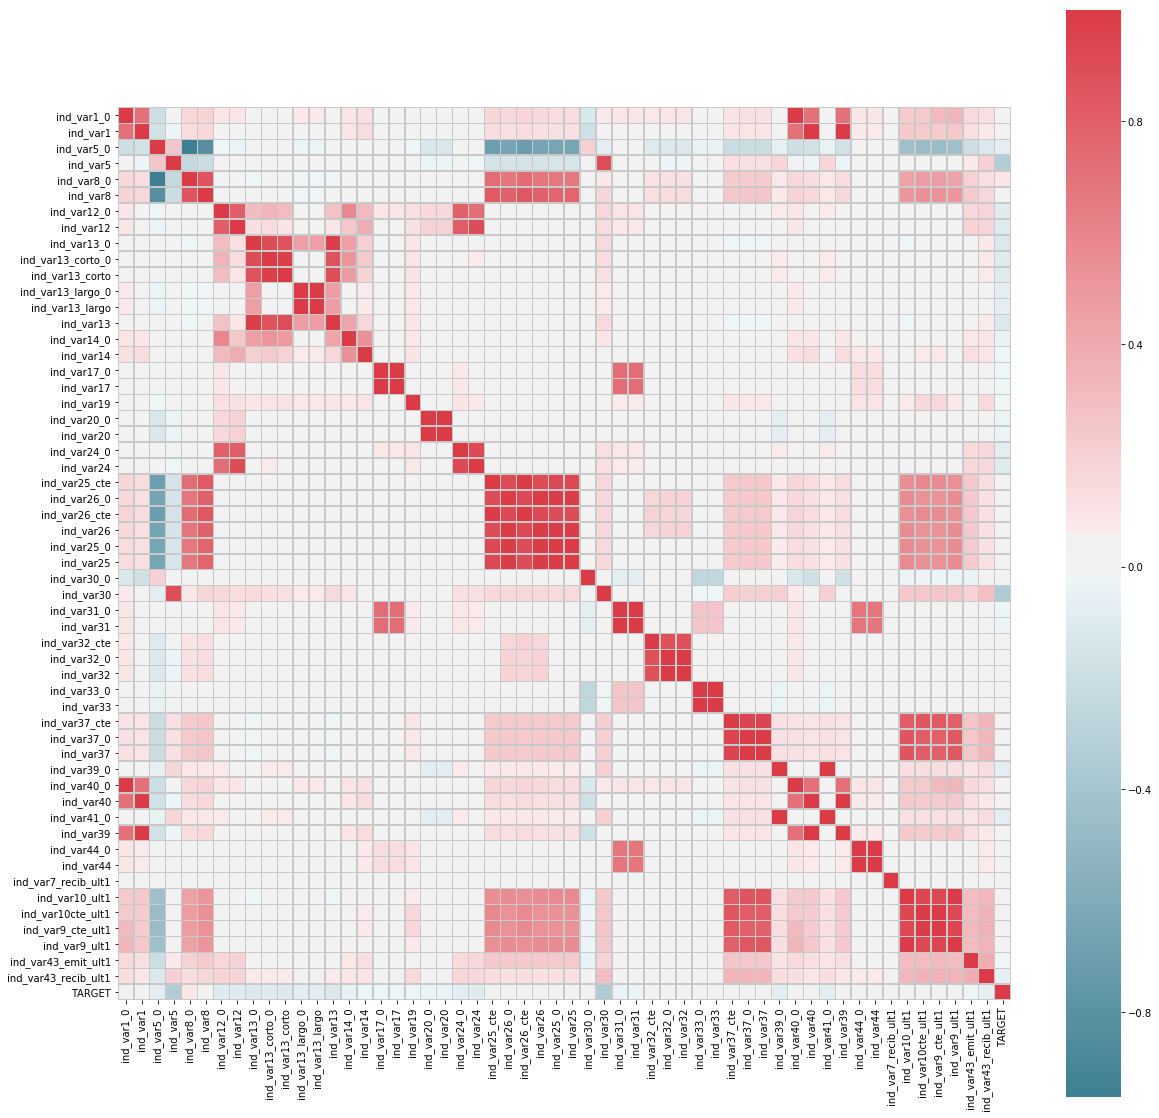

In [108]:
# Observando a correlação das variáveis binárias
binary_corr = df_binary_vars.corr()

fig, axis = plt.subplots(figsize=(20,20))
corr_cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(binary_corr, cmap=corr_cmap,
            linewidths=.5, linecolor='#c9c9c9', vmin=-1, vmax=1,
            square=True, xticklabels=True, yticklabels=True)

* **Ind_var5 e Ind_var30**: Em conjunto, estas duas variáveis apresentam forte correlação positiva, sugerindo que ambas tendem a ser atribuídas um valor positivo. Individualmente, apresentam considerável correlação negativa com a variável TARGET, sugerindo que essas duas variáveis auxiliam a identificar clientes satisfeitos

* **Ind_var8_0**: É a variável que e melhor representa correlação positiva com a variável target, de forma a auxiliar a identificar clientes insatisfeitos

# Análise de variáveis contínuas

In [136]:
df_numeric_cols

,Column,Zero_count,Unique_count,Mean,Median,Max
0,ID,0,6016,76265.20,76597.50,151811.00
1,var3,7,41,-1825.96,2.00,225.00
2,var15,0,79,36.19,33.00,102.00
89,num_var4,2474,7,0.90,1.00,6.00
90,num_var5_0,348,3,2.85,3.00,6.00
91,num_var5,2914,3,1.55,3.00,6.00
138,num_var30_0,15,6,3.24,3.00,114.00
139,num_var30,2552,5,1.84,3.00,12.00
148,num_var35,2474,9,2.76,3.00,27.00
152,num_var39_0,893,5,2.64,3.00,12.00


Observando a média, mediana, valores distintos e valor máximo, as variáveis que aparentam melhor representar dados contínuos são:

* saldo_var5
* saldo_var30
* saldo_var42
* saldo_medio_var5_hace2
* saldo_medio_var5_ult1
* saldo_medio_var5_ult3
* var38

As demais variáveis possuem menor variação de valores distintos, possivelmente representando algum ID ou valor codificado. São elas:

* num_var4
* num_var5_0
* num_var5
* num_var30_0
* num_var30
* num_var35
* num_var39_0
* num_var41_0
* num_var42_0
* num_var42
* var_36
* num_meses_var5_ult3
* num_meses_var39_vig_ult3

As variáveis restantes possuem características dos dois grupos e necessitarão de uma análise mais detalhada para compreendermos seu significado:

* var3
* var15

Faremos uma análise mais detalhada destas variáveis no próximo arquivo

In [138]:
train_sample.to_csv('../output/train_sample.csv', index=False)